# Food Vision Project

## GPU Check

In [1]:
!nvidia-smi

Sun Jan 22 04:04:15 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Import Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
import tensorflow as tf


## Get helper functions

Rather than rewritting all of the frequent functions again & again, we can save it in a python script and can call when it required.



In [5]:
!wget https://raw.githubusercontent.com/Shakhthi/Deep-Learning/main/TensorFlow%20Certificate%3A%202023/extras/helper_functions.py

--2023-01-22 06:02:06--  https://raw.githubusercontent.com/Shakhthi/Deep-Learning/main/TensorFlow%20Certificate%3A%202023/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11357 (11K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  11.09K  --.-KB/s    in 0.001s  

2023-01-22 06:02:06 (18.3 MB/s) - ‘helper_functions.py.1’ saved [11357/11357]



In [33]:
from helper_functions import unzip_data, plot_loss_curve, compare_historys, tensorboard_callback

## Use TensorFlow Datasets to Download Data

If you want to get an overview of TensorFlow Datasets (TFDS), read the guide: https://www.tensorflow.org/datasets/overview

In [7]:
import tensorflow_datasets as tfds

In [8]:
(train_data, test_data), ds_info = tfds.load(name="food101",
                                             split=["train", "validation"],
                                             shuffle_files=True,
                                             as_supervised=True,
                                             with_info=True
                                             )

## Explore the data

In [9]:
# viewing the meta data of our dataset
ds_info

tfds.core.DatasetInfo(
    name='food101',
    full_name='food101/2.0.0',
    description="""
    This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.
    """,
    homepage='https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/',
    data_path='/root/tensorflow_datasets/food101/2.0.0',
    file_format=tfrecord,
    download_size=4.65 GiB,
    dataset_size=4.77 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=101),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo n

In [10]:
# Features 
print(ds_info.features["image"], "\n")
print(ds_info.features["label"])

Image(shape=(None, None, 3), dtype=uint8) 

ClassLabel(shape=(), dtype=int64, num_classes=101)


In [11]:
# Data
print(train_data, "\n")
print(test_data)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))> 

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [12]:
# classes of the samples
class_names = ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [13]:
# picking samples
train_sample = train_data.take(1)
train_sample

<TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [14]:
for image, label in train_sample:
  print(f"""
        imgage shape: {image.shape}
        image dtype: {image.dtype}
        Target class name: {label}
        class name: {class_names[label.numpy()]}
  """)


        imgage shape: (512, 512, 3)
        image dtype: <dtype: 'uint8'>
        Target class name: 72
        class name: pancakes
  


In [15]:
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 42,  40,  51],
        [ 41,  39,  50],
        [ 40,  38,  49],
        ...,
        [ 50,  23,   6],
        [ 51,  24,   7],
        [ 51,  24,   7]],

       [[ 41,  39,  50],
        [ 41,  39,  50],
        [ 41,  39,  50],
        ...,
        [ 47,  20,   3],
        [ 48,  21,   4],
        [ 49,  22,   5]],

       [[ 40,  38,  49],
        [ 41,  39,  50],
        [ 42,  40,  51],
        ...,
        [ 47,  20,   3],
        [ 48,  21,   4],
        [ 48,  21,   4]],

       ...,

       [[188, 180, 191],
        [188, 180, 191],
        [189, 181, 192],
        ...,
        [179, 178, 186],
        [177, 176, 184],
        [175, 174, 182]],

       [[185, 177, 188],
        [186, 178, 189],
        [187, 179, 190],
        ...,
        [178, 177, 185],
        [176, 175, 183],
        [175, 174, 182]],

       [[179, 171, 182],
        [181, 173, 184],
        [183, 175, 186],
        ...,
        [177, 176, 18

In [16]:
# min & max of sample
tf.reduce_min(image), tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

## Plot an image from image dataset

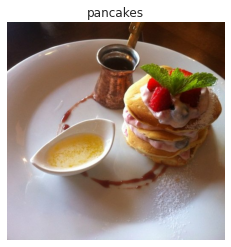

In [17]:
# Plot an image 
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False);

## Preprocessing functions for data

In [18]:
# 
def preprocess_image(image, label, image_shape=224):
  """
  converts data type tf.uint64 -> "tf.float32"
  and resizes given image into [image_shape,image_shape]
  """
  image = tf.image.resize(images=image, size=[image_shape, image_shape])
  #image = image/255  scaling the data 
  return tf.cast(image, tf.float32), label

In [19]:
preprocessed_image = preprocess_image(image, label)[0]

print(f"image before preprocessing: \n {image} \n ")
print(f"image after preprocessing: \n {preprocessed_image}")

image before preprocessing: 
 [[[ 42  40  51]
  [ 41  39  50]
  [ 40  38  49]
  ...
  [ 50  23   6]
  [ 51  24   7]
  [ 51  24   7]]

 [[ 41  39  50]
  [ 41  39  50]
  [ 41  39  50]
  ...
  [ 47  20   3]
  [ 48  21   4]
  [ 49  22   5]]

 [[ 40  38  49]
  [ 41  39  50]
  [ 42  40  51]
  ...
  [ 47  20   3]
  [ 48  21   4]
  [ 48  21   4]]

 ...

 [[188 180 191]
  [188 180 191]
  [189 181 192]
  ...
  [179 178 186]
  [177 176 184]
  [175 174 182]]

 [[185 177 188]
  [186 178 189]
  [187 179 190]
  ...
  [178 177 185]
  [176 175 183]
  [175 174 182]]

 [[179 171 182]
  [181 173 184]
  [183 175 186]
  ...
  [177 176 184]
  [176 175 183]
  [174 173 181]]] 
 
image after preprocessing: 
 [[[ 41.127552   39.127552   50.127552 ]
  [ 40.642857   38.642857   49.642857 ]
  [ 40.285713   38.285713   49.285713 ]
  ...
  [ 48.92855    21.928549    4.500022 ]
  [ 47.7398     20.7398      3.7398005]
  [ 49.301044   22.301043    5.3010426]]

 [[ 40.642857   38.642857   49.642857 ]
  [ 42.9949     40.9

In [20]:
train_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

## Batch & prefetch datasets

In [21]:
# Map preprocessing function to train data (to parallalize)
train_data = train_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# shuffle train data and turn into batches then set prefetch to load faster
train_data = train_data.shuffle(buffer_size=1000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Map preprocessing funtion to test data
test_data = test_data.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
train_data, test_data

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

## Callbacks setup

In [23]:
# ModelCheckPoint callback 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint_logs/checkpoint.ckpt",
                                                         monitor="val_accuracy",
                                                         save_best_only=True,
                                                         save_weights_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

## Setup mixed precision training

Mixed precision utilizes a combination of float32 and float16 data types to speed up model performance.

In [24]:
# Turn on mixed precision
from tensorflow.keras import mixed_precision

mixed_precision.set_global_policy("float32")

In [25]:
mixed_precision.global_policy()

<Policy "float32">

## Feature Extraction model

In [26]:
INPUT_SHAPE = (224, 224, 3)

#Backbone model - EfficientNet B0
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=INPUT_SHAPE, name="input_layer")

x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D(name="Average_Pooling_Layer")(x)

x = tf.keras.layers.Dense(len(class_names), name="output_layer")(x)

outputs = tf.keras.layers.Activation(activation="softmax", dtype=tf.float32, name="softmax_float32")(x)

model = tf.keras.Model(inputs, outputs)


In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Average_Pooling_Layer (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 101)               129381    
                                                                 
 softmax_float32 (Activation  (None, 101)              0         
 )                                                               
                                                                 
Total params: 4,178,952
Trainable params: 129,381
Non-trainab

## Checking layer dtype policies (are we using mixed precision?)

In [30]:
for layer in model.layers:
  print(layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

input_layer True float32 <Policy "float32">
efficientnetb0 False float32 <Policy "float32">
Average_Pooling_Layer True float32 <Policy "float32">
output_layer True float32 <Policy "float32">
softmax_float32 True float32 <Policy "float32">


In [31]:
# Check dtype attributes of the backbone model
for i, layer in enumerate(model.layers[1].layers):
  print(i, layer.name, layer.trainable, layer.dtype, layer.dtype_policy)

0 input_1 False float32 <Policy "float32">
1 rescaling False float32 <Policy "float32">
2 normalization False float32 <Policy "float32">
3 tf.math.truediv False float32 <Policy "float32">
4 stem_conv_pad False float32 <Policy "float32">
5 stem_conv False float32 <Policy "float32">
6 stem_bn False float32 <Policy "float32">
7 stem_activation False float32 <Policy "float32">
8 block1a_dwconv False float32 <Policy "float32">
9 block1a_bn False float32 <Policy "float32">
10 block1a_activation False float32 <Policy "float32">
11 block1a_se_squeeze False float32 <Policy "float32">
12 block1a_se_reshape False float32 <Policy "float32">
13 block1a_se_reduce False float32 <Policy "float32">
14 block1a_se_expand False float32 <Policy "float32">
15 block1a_se_excite False float32 <Policy "float32">
16 block1a_project_conv False float32 <Policy "float32">
17 block1a_project_bn False float32 <Policy "float32">
18 block2a_expand_conv False float32 <Policy "float32">
19 block2a_expand_bn False float3

## Fit the feature extraction model

In [34]:
from tensorflow.python.eager.def_function import experimental_functions_run_eagerly
history_food101_model = model.fit(train_data,
                                  epochs=3,
                                  validation_data=test_data,
                                  validation_steps = int(0.15 * len(test_data)),
                                  callbacks = [tensorboard_callback(dir_name="Food_Vision_perfomence_logs",
                                                                    experiment_name="EfficientNet_B0_feature_extraction_model")])

Saving TensorBoard logfiles to: Food_Vision_perfomence_logs/EfficientNet_B0_feature_extraction_model/22012023-061213
Epoch 1/3
2368/2368 [==============================] - 187s 73ms/step - loss: 1.7164 - accuracy: 0.5819 - val_loss: 1.1254 - val_accuracy: 0.6992
Epoch 2/3
2368/2368 [==============================] - 168s 70ms/step - loss: 1.1985 - accuracy: 0.6888 - val_loss: 1.0402 - val_accuracy: 0.7148
Epoch 3/3
2368/2368 [==============================] - 170s 71ms/step - loss: 1.0538 - accuracy: 0.7234 - val_loss: 0.9964 - val_accuracy: 0.7280


In [36]:
results_feature_extraction_model = model.evaluate(test_data)

790/790 [==============================] - 62s 78ms/step - loss: 0.9935 - accuracy: 0.7311


## Test with custom data

In [42]:
import os

In [40]:
!git clone https://github.com/Shakhthi/Deep-Learning.git

Cloning into 'Deep-Learning'...
remote: Enumerating objects: 402, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 402 (delta 12), reused 0 (delta 0), pack-reused 367
Receiving objects: 100% (402/402), 207.68 MiB | 42.29 MiB/s, done.
Resolving deltas: 100% (129/129), done.
Updating files: 100% (267/267), done.


In [44]:
path = "/content/Deep-Learning/TensorFlow Certificate: 2023/images/pizza_samples"
for i in os.listdir(path):
  print(i)

pizza-4.jpg
pizza-2.jpg
pizza-3.jpg
pizza-1.jpg


In [51]:
from helper_functions import load_and_prep_image, pred_and_plot

In [105]:
ifile1 = "/content/Shushi_1.jpg"
ifile2 = "/content/shushi_2.jpg"
s1 = load_and_prep_image(filename=ifile1, scale=True)
s2 = load_and_prep_image(filename=ifile2, scale=True)

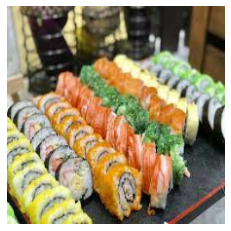

In [99]:
plt.imshow(s1)
plt.axis(False);

In [100]:
test1 = tf.image.resize(s1, size=(224,224))
test1 = tf.cast(s1, tf.float32)

In [101]:
test1 = tf.expand_dims(s1, axis=0)

In [108]:
s_r = model.predict(s1)
s_r.shape

7/7 [==============================] - 0s 12ms/step


(7, 101)

In [103]:
class_names[s_r]

IndexError: ignored

In [104]:
s_r

357